Loading libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from pprint import pprint as pp
import csv
from pathlib import Path
import seaborn as sns
from itertools import product
import string

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [5]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 235.6/235.6 kB 2.1 MB/s eta 0:00:00
     -------------------------------------- 302.0/302.0 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline

In [7]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN

In [8]:
import gensim
from gensim import corpora

In [ ]:
df = pd.read_csv("Fraud.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [10]:
print(df.columns)

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [11]:
# Count the occurrences of fraud and no fraud and print them
occ = df['nameDest'].value_counts()
occ

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

In [12]:
print(df.index)

RangeIndex(start=0, stop=6362620, step=1)


In [13]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [14]:
# there are no any null values in the data set

In [15]:
df_new = df.iloc[:,:]
df_new

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [16]:
df_new["isFlaggedFraud_yn"] = 1
df_new

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isFlaggedFraud_yn
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,1
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,1


In [17]:
#Changing Normal as 0 and Fraud as 1
df_new.loc[df['isFraud'] == 'Fraud', 'isFlaggedFraud_yn'] = 0

In [18]:
df_new

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isFlaggedFraud_yn
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,1
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,1


In [19]:
df_new.drop('isFraud', inplace = True, axis =1)
df_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFlaggedFraud_yn
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,1


In [47]:
#EDA

In [49]:
df.rename(columns={'newbalanceOrig':'newbalanceOrg'},inplace=True)
df.drop(labels=['nameOrig','nameDest'],axis=1,inplace=True)

In [50]:
print('Minimum value of Amount, Old/New Balance of Origin/Destination:')
df[[ 'amount','oldbalanceOrg', 'newbalanceOrg', 'oldbalanceDest', 'newbalanceDest']].min()

Minimum value of Amount, Old/New Balance of Origin/Destination:


amount            0.0
oldbalanceOrg     0.0
newbalanceOrg     0.0
oldbalanceDest    0.0
newbalanceDest    0.0
dtype: float64

In [51]:
print('Maximum value of Amount, Old/New Balance of Origin/Destination:')
df[[ 'amount','oldbalanceOrg', 'newbalanceOrg', 'oldbalanceDest', 'newbalanceDest']].max()

Maximum value of Amount, Old/New Balance of Origin/Destination:


amount            9.244552e+07
oldbalanceOrg     5.958504e+07
newbalanceOrg     4.958504e+07
oldbalanceDest    3.560159e+08
newbalanceDest    3.561793e+08
dtype: float64

In [21]:
df_new.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFlaggedFraud_yn
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.003277,NaN
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.012295,NaN
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.003835,NaN
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,0.003776,NaN
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.000513,NaN
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,-0.000529,NaN
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,1.000000,NaN
isFlaggedFraud_yn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

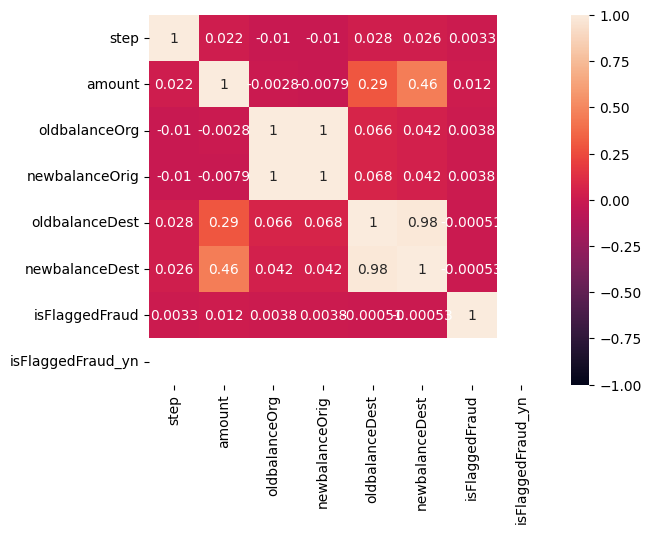

In [22]:
sns.heatmap(df_new.corr(), vmin = -1, vmax = 1, annot = True)

<Axes: xlabel='isFlaggedFraud_yn', ylabel='count'>

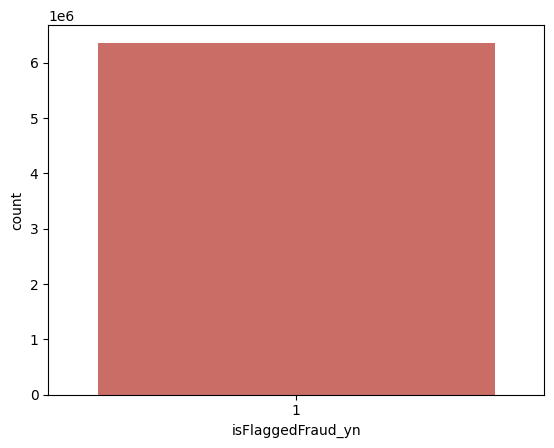

In [23]:
sns.countplot(x = 'isFlaggedFraud_yn', data = df_new, palette = 'hls')

In [24]:
# for visualization

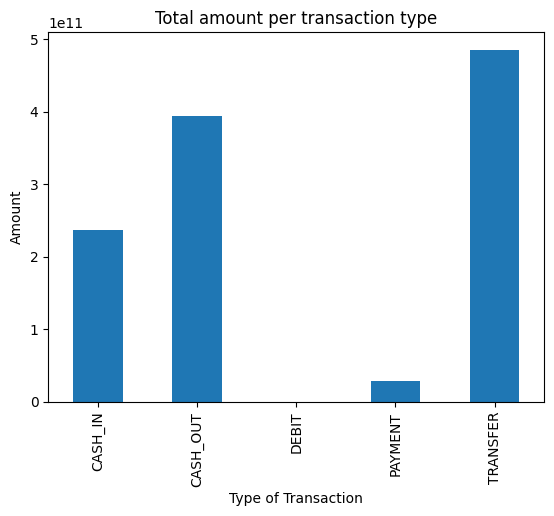

In [53]:
var = df.groupby('type').amount.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
var.plot(kind='bar')
ax1.set_title("Total amount per transaction type")
ax1.set_xlabel('Type of Transaction')
ax1.set_ylabel('Amount');

In [55]:
print(df.columns)

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrg',
       'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud',
       'isFlaggedFraud_yn'],
      dtype='object')


In [58]:
df.loc[df.isFlaggedFraud_yn == 1].type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

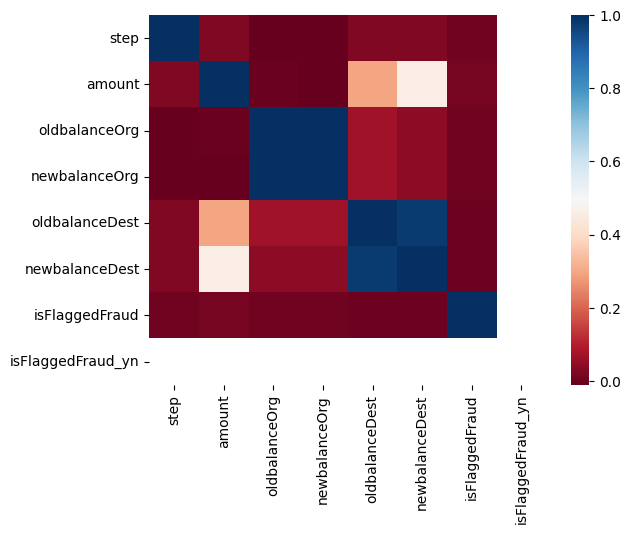

In [59]:
sns.heatmap(df.corr(),cmap='RdBu');

In [61]:
fraud = df.loc[df.isFlaggedFraud_yn == 1]
nonfraud = df.loc[df.isFlaggedFraud_yn == 0]

In [63]:
fraudcount = fraud.isFlaggedFraud_yn.count()
nonfraudcount = nonfraud.isFlaggedFraud_yn.count()

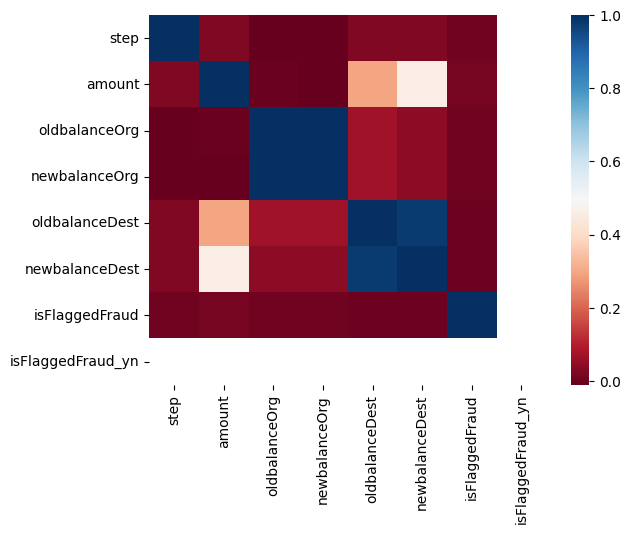

In [64]:
sns.heatmap(df_new.corr(),cmap='RdBu',);

In [72]:
print('The total number of fraud transaction is {}.'.format(df.isFlaggedFraud_yn.sum()))
print('The total number of fraud transaction which is marked as fraud {}.'.format(df.isFlaggedFraud.sum()))
print('Ratio of fraud transaction vs non-fraud transaction is 1:{}.'.format(int(nonfraudcount//fraudcount)))

The total number of fraud transaction is 6362620.
The total number of fraud transaction which is marked as fraud 16.
Ratio of fraud transaction vs non-fraud transaction is 1:0.


In [73]:
print('Thus in every 773 transaction there is 1 fraud transaction happening.')
print('Amount lost due to these fraud transaction is ${}.'.format(int(fraud.amount.sum())))

Thus in every 773 transaction there is 1 fraud transaction happening.
Amount lost due to these fraud transaction is $1144392944759.


In [74]:
piedata = fraud.groupby(['isFlaggedFraud']).sum()

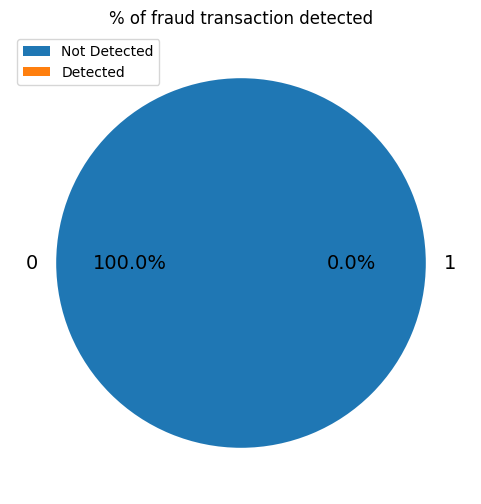

In [76]:
f, axes = plt.subplots(1,1, figsize=(6,6))
axes.set_title("% of fraud transaction detected")
piedata.plot(kind='pie',y='isFlaggedFraud_yn',ax=axes, fontsize=14,shadow=False,autopct='%1.1f%%');
axes.set_ylabel('');
plt.legend(loc='upper left',labels=['Not Detected','Detected'])
plt.show()

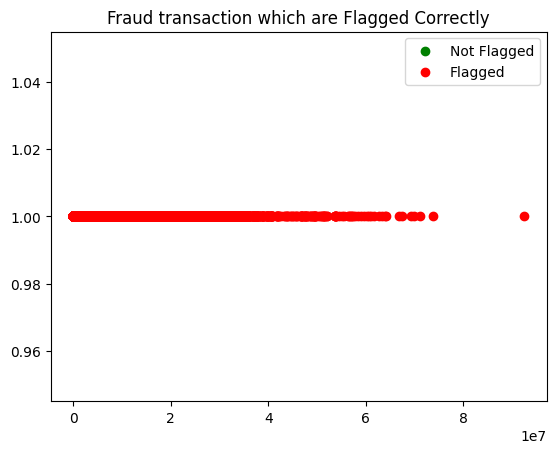

In [77]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.set_title("Fraud transaction which are Flagged Correctly")
axes.scatter(nonfraud['amount'],nonfraud['isFlaggedFraud_yn'],c='g')
axes.scatter(fraud['amount'],fraud['isFlaggedFraud_yn'],c='r')
plt.legend(loc='upper right',labels=['Not Flagged','Flagged'])
plt.show()

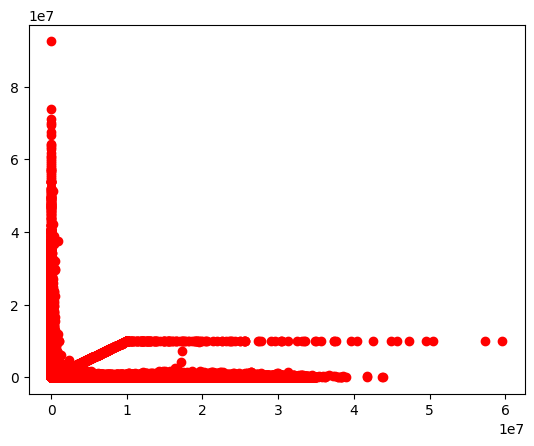

In [78]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nonfraud['oldbalanceOrg'],nonfraud['amount'],c='g')
ax.scatter(fraud['oldbalanceOrg'],fraud['amount'],c='r')
plt.show()

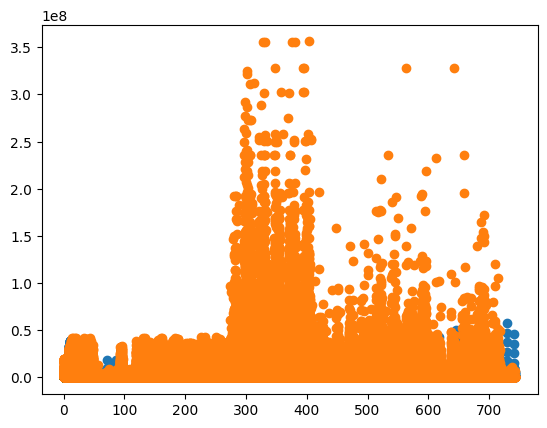

In [79]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['oldbalanceOrg'])
ax.scatter(fraud['step'],fraud['oldbalanceDest'])
plt.show()

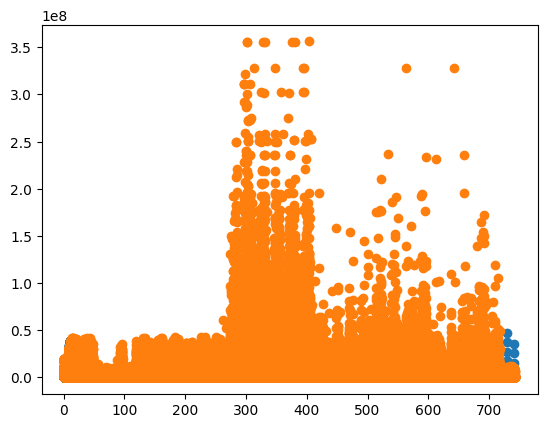

In [80]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['newbalanceOrg'])
ax.scatter(fraud['step'],fraud['newbalanceDest'])
plt.show()

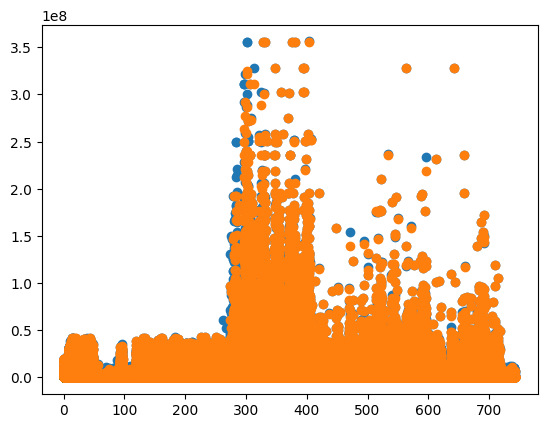

In [81]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['newbalanceDest'])
ax.scatter(fraud['step'],fraud['oldbalanceDest'])
plt.show()

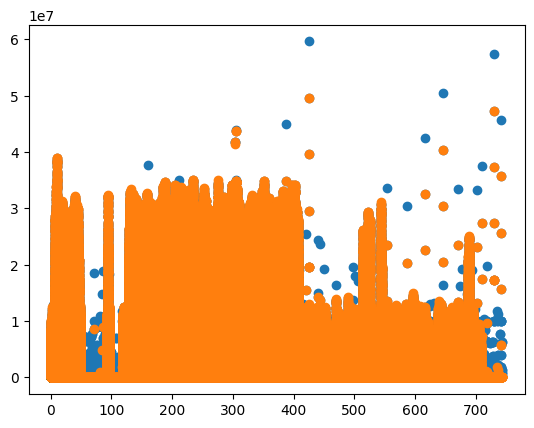

In [82]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['oldbalanceOrg'])
ax.scatter(fraud['step'],fraud['newbalanceOrg'])
plt.show()

In [84]:
np.shape(df_new)

(6362620, 9)

In [85]:
from sklearn.model_selection import train_test_split # trian and test
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [86]:
#Sliptting the data into train and test

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [88]:
x_train

,step,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFlaggedFraud
2709048,211,CASH_OUT,172962.06,0.00,0.00,2027990.32,2200952.38,0
3571212,261,PAYMENT,5404.86,0.00,0.00,0.00,0.00,0
3854856,283,CASH_OUT,113304.41,0.00,0.00,1249083.42,1362387.83,0
2468551,204,TRANSFER,310173.75,0.00,0.00,437128.16,747301.91,0
5126077,356,CASH_IN,234122.85,5988232.19,6222355.04,1158159.98,924037.13,0
...,...,...,...,...,...,...,...,...
2249467,187,CASH_OUT,113691.83,4231.00,0.00,397758.64,511450.47,0
5157699,357,CASH_OUT,3891.96,20146.00,16254.04,253375.00,257266.97,0
2215104,186,CASH_IN,79840.52,10152925.86,10232766.38,276175.87,196335.36,0
1484405,141,CASH_IN,568604.50,1081784.28,1650388.77,2631796.49,2063191.99,0


In [89]:
x_test

,step,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFlaggedFraud
4644207,330,CASH_IN,607193.64,15458649.28,16065842.92,3394537.70,2787344.06,0
3800666,281,PAYMENT,3473.75,0.00,0.00,0.00,0.00,0
4426240,322,CASH_OUT,66170.69,32803.00,0.00,0.00,66170.69,0
5788765,401,TRANSFER,335384.26,197.00,0.00,5311958.61,5647342.87,0
2010701,180,CASH_IN,234392.25,20882.00,255274.25,0.00,0.00,0
...,...,...,...,...,...,...,...,...
4511782,325,PAYMENT,19892.67,60698.00,40805.33,0.00,0.00,0
3685193,276,PAYMENT,1069.54,30357.95,29288.41,0.00,0.00,0
1073982,129,PAYMENT,49579.20,15091.84,0.00,0.00,0.00,0
2701914,211,CASH_OUT,613.44,118.00,0.00,243998.43,244611.87,0


In [90]:
x_test.shape

(1590655, 8)

In [91]:
y_train

2709048    1
3571212    1
3854856    1
2468551    1
5126077    1
          ..
2249467    1
5157699    1
2215104    1
1484405    1
4500015    1
Name: isFlaggedFraud_yn, Length: 4771965, dtype: int64

In [92]:
y_test

4644207    1
3800666    1
4426240    1
5788765    1
2010701    1
          ..
4511782    1
3685193    1
1073982    1
2701914    1
4267490    1
Name: isFlaggedFraud_yn, Length: 1590655, dtype: int64

In [ ]:
#1. Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression

logisticlassifier = LogisticRegression()

In [ ]:
logisticlassifier.fit(x_train, y_train)

logisticlassifier.coef_ # coefficients of features

In [95]:
#After the traing the model then we prediction on test data

In [96]:
y_pred = logisticlassifier.predict(x_test)
y_pred

NotFittedError: ignored

In [ ]:
#let's test the performance of our model - confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_logist = confusion_matrix(y_test, y_pred)

confusion_logist


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# THRESHOLD SELECTION

proba = logisticlassifier.predict_proba(x_test)[:,1]
proba

In [ ]:
auc = roc_auc_score(y_test,proba)
fpr,tpr, threshold = roc_curve(y_test,proba)

plt.plot(fpr,tpr,label ='(AUC =%0.2f)'%auc)
plt.legend()

In [ ]:
#Accuracy of a Model

In [ ]:
# Train Accuracy

train_acc_logist = np.mean(logisticlassifier.predict(x_train)== y_train)
train_acc_logist

In [ ]:
# Test Accuracy

test_acc_logist = np.mean(logisticlassifier.predict(x_test)== y_test)
test_acc_logist

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.metrics import accuracy_score

logistic_acc = accuracy_score(y_test, y_pred)
logistic_acc

In [ ]:
#Accuracy of overall model

In [ ]:
logisticlassifier.fit(x, y)

logisticlassifier.coef_ # coefficients of features

In [ ]:
y_pred = logisticlassifier.predict(x)

confusion_matrix = confusion_matrix(y, y_pred)
confusion_matrix

In [ ]:
acc = accuracy_score(y, y_pred)
acc

In [ ]:
logisticlassifier.score(x_test, y_test)

In [ ]:
logisticlassifier.score(x_train, y_train)

From the accuracy we can say that the model is overfitted to avoid overfit problem we use Regularozation method
here we have L1, L2 regularization
It turns out they have different but equally useful properties. From a practical standpoint, L1 tends to shrink coefficients to zero whereas L2 tends to shrink coefficients evenly. L1 is therefore useful for feature selection, as we can drop any variables associated with coefficients that go to zero.
L1 = lasso regularization

In [ ]:
from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha = 50, max_iter = 100, tol =0.1)

lasso_reg.fit(x_train, y_train)

In [ ]:
lasso_reg.score(x_test, y_test)

In [ ]:
lasso_reg.score(x_train, y_train)

In [ ]:
#L2 = Ridge regularization

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 50, max_iter = 100, tol = 0.1)

ridge_reg.fit(x_train, y_train)

In [ ]:
ridge_reg.score(x_test, y_test)

In [ ]:
ridge_reg.score(x_train, y_train)

2. KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNC
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#To choose k value

In [ ]:
import math
math.sqrt(len(y_test))

In [ ]:
#Here we are choosing the k value to be 7 (choosing odd value)

Define the model KNN and fit model

In [ ]:
KNN_classifier = KNC(n_neighbors =7, p = 2, metric = 'euclidean')

In [ ]:
KNN_classifier.fit(x_train, y_train)

In [ ]:
#Predict the Test set results

In [ ]:
y_pred = KNN_classifier.predict(x_test)
y_pred

In [ ]:
#Evaluate model

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))

In [ ]:
#Accuracy of KNN model

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

KNN_acc = accuracy_score(y_test, y_pred)
KNN_acc

In [ ]:
print(classification_report(y_test,y_pred))

3. Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

from sklearn.naive_bayes import MultinomialNB

In [ ]:
#Creating GaussianNB and MultinomialNB functions

In [ ]:
GNB = GaussianNB()
MNB = MultinomialNB()

In [ ]:
#Building the model with GaussianNB

In [ ]:
Naive_GNB = GNB.fit(x_train ,y_train)

y_pred = Naive_GNB.predict(x_test)
y_pred

In [ ]:
#Evaluate Model

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
#Accuracy of GNB

In [ ]:
from sklearn.metrics import accuracy_score

GNB_acc = accuracy_score(y_test , y_pred)
GNB_acc

In [ ]:
#Building the model with MultinomialNB

In [ ]:
Naive_MNB = MNB.fit(x_train ,y_train)

y_pred = Naive_MNB.predict(x_test)
y_pred

In [ ]:
#Evaluating Model

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
#Accuracy of MNB

In [ ]:
from sklearn.metrics import accuracy_score

MNB_acc = accuracy_score(y_test , y_pred)
MNB_acc

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
#Support Vector Machine

In [ ]:
from sklearn.svm import SVC


Kernel = Linear model


In [ ]:
model_linear = SVC(kernel = 'linear')

model_linear.fit(x_train, y_train)

pred_test_linear = model_linear.predict(x_test)

np.mean(pred_test_linear==y_test)

In [ ]:
#Kernel = ploy model

In [ ]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)

np.mean(pred_test_poly==y_test) # Accuracy

In [ ]:
#Kernel = 'rbf' model --> Radial Basis Function

In [ ]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)

np.mean(pred_test_rbf==y_test) # Accuracy

In [ ]:
import pickle
pickle_out = open("model_poly.pkl","wb")
pickle.dump(model_poly, pickle_out)
pickle_out.close()

4. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
y_pred

In [ ]:
print(f"Training Accuracy : {dt.score(x_train,y_train)}")
print(f"Testing Accuracy : {dt.score(x_test,y_test)}")
print(classification_report(y_test,y_pred))

In [ ]:
print(accuracy_score(y_test, y_pred))

In [ ]:
print(f1_score(y_test, y_pred))

In [ ]:
print(recall_score(y_test, y_pred))

In [ ]:
from sklearn import tree
tree.plot_tree(dt,feature_names=x.columns, filled=True)
plt.show()

5. Random forest classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create a random forest classifier
model1 = RandomForestClassifier()

In [ ]:
# Train the model
model1.fit(x_train, y_train)

In [ ]:
# Make predictions on the testing set
y_pred = model1.predict(x_test)

In [ ]:
y_pred

In [ ]:
print(f"Training Accuracy : {model1.score(x_train,y_train)}")
print(f"Testing Accuracy : {model1.score(x_test,y_test)}")
print(classification_report(y_test,y_pred))

In [ ]:
print(accuracy_score(y_test, y_pred))


In [ ]:
print(f1_score(y_test, y_pred))

In [ ]:
print(recall_score(y_test, y_pred))

In [ ]:
print(precision_score(y_test, y_pred))

6. Adaboost Model

In [ ]:
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier, VotingClassifier
from xgboost import XGBClassifier

In [ ]:
def predictions(model):
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  print(f"Training Accuracy : {model.score(x_train,y_train)}")
  print(f"Testing Accuracy : {model.score(x_test,y_test)}")
  print(classification_report(y_test,y_pred))

In [ ]:
predictions(AdaBoostClassifier())

In [ ]:
import pickle
pickle_out = open("model.pkl", "wb")
pickle.dump(AdaBoostClassifier, pickle_out)
pickle_out.close()

Comparison of Models

Using Lazypredict to check the accuracy of different algorithms on the data

In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(bankrupt_new.drop(columns=['class_yn']),
                                              bankrupt_new['class_yn'],
                                              test_size=0.2,
                                              random_state=42)

In [ ]:
clf=LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)

In [ ]:
models,predictions=clf.fit(X_train,X_test,y_train,y_test)

In [ ]:
print(models)

In [ ]:
#We have taken Random Forest classifier as our model with greater accuracy of prediction

In [ ]:
#make pickle
import pickle
pickle.dump(model1,open('model.pkl','wb'))

In [ ]:
from flask import Flask, request,jsonify, render_template
import pickle
#create flask app
app= Flask(__name__)

#load pickle model
model1= pickle.load(open('model.pkl','rb'))

@app.route("/")
def Home():
    return render_template('index1.html')

@app.route("/predict", methods=["POST"])

def predict():
    float_features=[float(x) for x in request.form.values()]
    features=[np.array(float_features)]
    prediction=model1.predict(features)
    if prediction[0]==0:
        ans= 'Bankrupt'
    else:
        ans='Non-Bankrupt'

    return render_template('index1.html',prediction_text="The company is "+ans)


if __name__=="__main__":
    app.run(debug= True)


In [65]:
df_new.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrg',
       'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud',
       'isFlaggedFraud_yn'],
      dtype='object')

In [66]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification

In [67]:
# Input
x = df_new.iloc[:,:-1]

# Target variable

y = df_new.iloc[:,-1]

In [69]:
model=ExtraTreesClassifier()


In [70]:
model.fit(x,y)

ValueError: ignored

In [ ]:
print(model.feature_importances_)

In [82]:
# Print the ratio of fraud cases
ratio_cases = occ/len(df.index)
print(f'Ratio of fraudulent cases: {ratio_cases[1]}\nRatio of non-fraudulent cases: {ratio_cases[0]}')

Ratio of fraudulent cases: 1.713130754311903e-05
Ratio of non-fraudulent cases: 1.7759979379563763e-05


In [83]:
# Data visualization

In [84]:
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
    Convert the DataFrame into two variable
    X: data columns (V1 - V28)
    y: lable column
    """
    X = df.iloc[:, 2:30].values
    y = df.nameDest.values
    return X, y

In [85]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="nameDest #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="nameDest #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

In [86]:
# Create X and y from the prep_data function
X, y = prep_data(df)

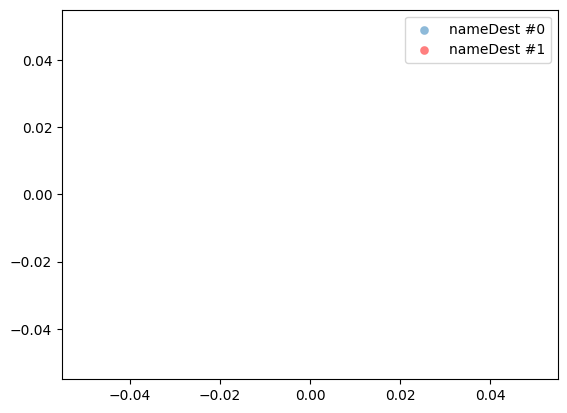

In [87]:
# Plot our data by running our plot data function on X and y
plot_data(X, y)

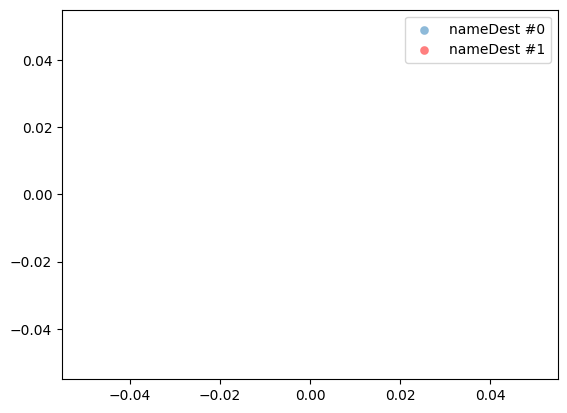

In [88]:
plt.scatter(df.type[df.nameDest == 0], df.amount[df.nameDest == 0], label="nameDest #0", alpha=0.5, linewidth=0.15)
plt.scatter(df.type[df.nameDest == 1], df.amount[df.nameDest == 1], label="nameDest #1", alpha=0.5, linewidth=0.15, c='r')
plt.legend()
plt.show()

In [89]:
from imblearn.over_sampling import RandomOverSampler

# Create an instance of RandomOverSampler
ros = RandomOverSampler()

In [97]:
print ("Fraud")
print (df.nameDest[df.isFraud == 1].describe())
print ()
print ("Normal")
print (df.nameDest[df.isFraud == 0].describe())

Fraud
count            8213
unique           8169
top       C1193568854
freq                2
Name: nameDest, dtype: object

Normal
count         6354407
unique        2719685
top       C1286084959
freq              113
Name: nameDest, dtype: object


In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.nameDest[df.isFraud == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.nameDest[df.isFraud == 0], bins = bins)
ax2.set_title('Normal')


plt.ylabel('Number of Transactions')
plt.show()